# Extracting Vega Lite Transformations

In this notebook, we use extract out the [transformations](https://vega.github.io/vega-lite/docs/transform.html) in the Vega Lite spec generated by Altair and push them to the server, by adding them to the SQL query with Ibis.

In [1]:
import altair as alt
import ibis
import jupyterlab_omnisci

## Carrier names

First we connect to the table using Ibis:

In [2]:
conn = ibis.mapd.connect(
    host='metis.mapd.com', user='mapd', password='HyperInteractive',
    port=443, database='mapd', protocol= 'https'
)
t = conn.table("flights_donotmodify")

Then we compose an Altair chart using an ibis expression.

In [3]:
c = alt.Chart(t[t.carrier_name]).mark_bar().encode(
    x='carrier_name',
    y='count()'
)

Finally, we enable rendering that extracts the aggregate expressions and adds them onto the Ibis expresion:

/usr/local/miniconda3/envs/jupyterlab-omnisci/lib/python3.6/site-packages/altair/utils/core.py:86: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ))


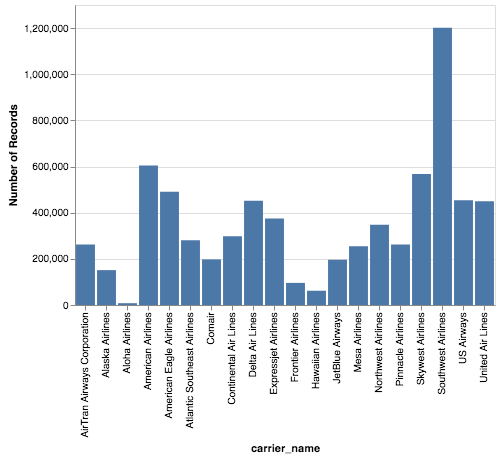

In [4]:
alt.data_transformers.enable('ibis')
alt.renderers.enable("ibis")
c

The only data loaded into the browser for this chart is one row for each carrier, because the counting transformation is pushed to the SQL statement.

## Delay by Month

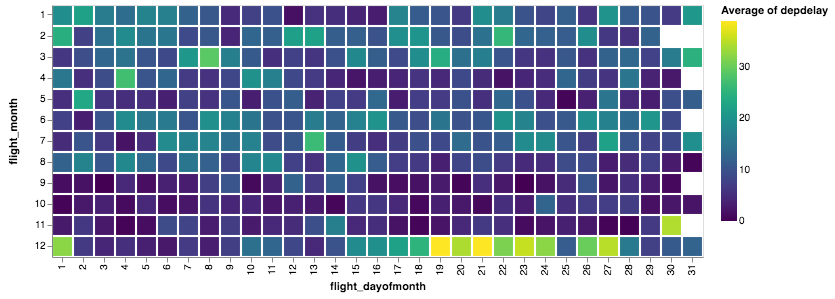

In [5]:
delay_by_month = alt.Chart(t[t.flight_dayofmonth, t.flight_month, t.depdelay]).mark_rect().encode(
    x='flight_dayofmonth:O',
    y='flight_month:O',
    color='average(depdelay)'
)
delay_by_month

## Debugging

We can use `display_chart` to show some intermediate computatitons for the chart. It does this by enabling different Altair renderers and displaying the chart:

In [9]:
?jupyterlab_omnisci.display_chart

Signature: jupyterlab_omnisci.display_chart(chart:altair.vegalite.v2.api.Chart, backend_render=False) -> None
Docstring:
Given an Altair chart created around an Ibis expression, this displays the different
stages of rendering of that chart. Helpful for debugging.

backend_render: Whether to also render with OmniSci's builtin Vega rendering.
File:      ~/p/mapd/notebooks/jupyterlab-omnisci/jupyterlab_omnisci/altair.py
Type:      function


<IPython.core.display.JSON object>

SELECT "carrier_name"
FROM flights_donotmodify

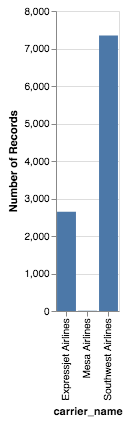

<IPython.core.display.JSON object>

SELECT "carrier_name"
FROM flights_donotmodify

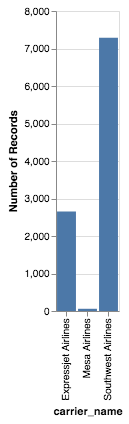

<IPython.core.display.JSON object>

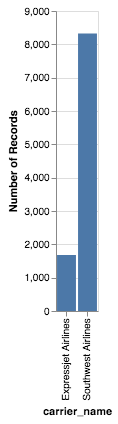

<IPython.core.display.JSON object>

SELECT "carrier_name", count(*) AS "count_*"
FROM (
  SELECT "carrier_name"
  FROM flights_donotmodify
) t0
GROUP BY carrier_name

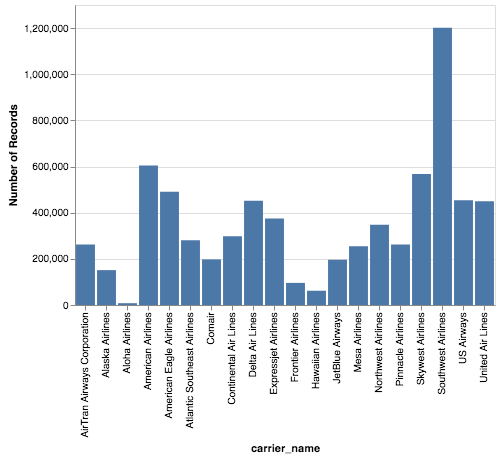

In [7]:
jupyterlab_omnisci.display_chart(c)

<IPython.core.display.JSON object>

SELECT "flight_dayofmonth", "flight_month", "depdelay"
FROM flights_donotmodify

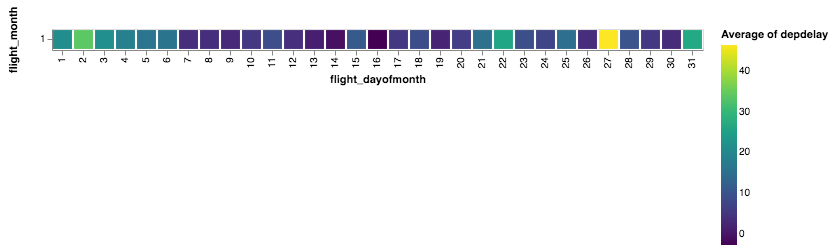

<IPython.core.display.JSON object>

SELECT "flight_dayofmonth", "flight_month", "depdelay"
FROM flights_donotmodify

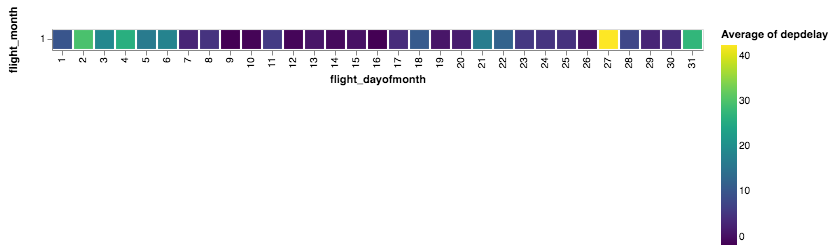

<IPython.core.display.JSON object>

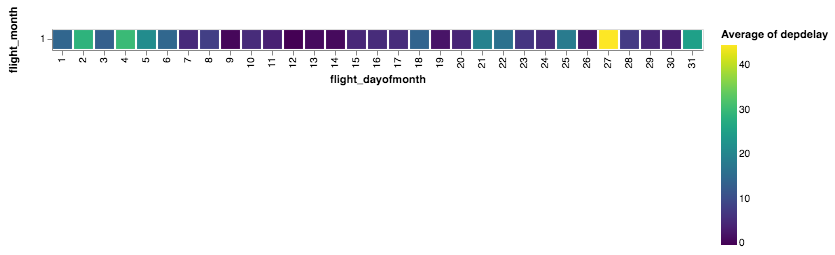

<IPython.core.display.JSON object>

SELECT "flight_dayofmonth", "flight_month",
       avg("depdelay") AS average_depdelay
FROM (
  SELECT "flight_dayofmonth", "flight_month", "depdelay"
  FROM flights_donotmodify
) t0
GROUP BY flight_dayofmonth, flight_month

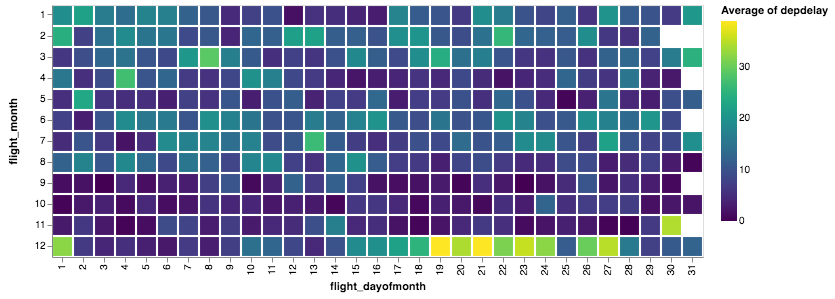

In [8]:
jupyterlab_omnisci.display_chart(delay_by_month)